# **Question 1.**


In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
np.random.seed(9205045)
A = list(np.random.randint(low = 10, high = 101, size = 10))


In [3]:
np.random.seed(9205045)
B = list(np.random.randint(low = 10, high = 101, size = 15))

In [4]:
C = A + B
C

[95,
 11,
 38,
 21,
 13,
 38,
 15,
 15,
 19,
 66,
 95,
 11,
 38,
 21,
 13,
 38,
 15,
 15,
 19,
 66,
 10,
 53,
 97,
 84,
 92]

In [8]:
type(C)

list

# **Question 2.**

In [9]:
def summary(x):
    Min = np.min(x)
    Max = np.max(x)
    Mean = np.mean(x)
    SD = np.std(x)
    CV = np.std(x)/np.mean(x) * 100
    Length = len(x)
    dataframe=pd.DataFrame({'Metric': ['Min', 'Max', 'Mean', 'SD', 'CV', 'Length'],
                          'Value': [Min, Max, Mean, SD, CV, Length]})
    dataframe.Value=[round(x,y) for x , y in zip(dataframe.Value, [0, 0, 2, 2, 2, 0])]
    return dataframe.astype(object)
    
    

In [10]:
summary(C)

,Metric,Value
0,Min,10.0
1,Max,97.0
2,Mean,39.92
3,SD,30.74
4,CV,77.0
5,Length,25.0


# **Question 3.**

***Solution number 1.***

In [11]:
numbers = []
for i in range(659, 857):
    if ((i % 9 == 0) or (i % 7 == 0)):
        numbers.append(i)
        

In [12]:
numbers

[665,
 666,
 672,
 675,
 679,
 684,
 686,
 693,
 700,
 702,
 707,
 711,
 714,
 720,
 721,
 728,
 729,
 735,
 738,
 742,
 747,
 749,
 756,
 763,
 765,
 770,
 774,
 777,
 783,
 784,
 791,
 792,
 798,
 801,
 805,
 810,
 812,
 819,
 826,
 828,
 833,
 837,
 840,
 846,
 847,
 854,
 855]

***Solution number 2 with list comprehension.***

In [13]:
numbers_2=[i for i in range(659, 857) if ((i%9 ==0) or (i % 7 == 0))]

In [14]:
numbers_2

[665,
 666,
 672,
 675,
 679,
 684,
 686,
 693,
 700,
 702,
 707,
 711,
 714,
 720,
 721,
 728,
 729,
 735,
 738,
 742,
 747,
 749,
 756,
 763,
 765,
 770,
 774,
 777,
 783,
 784,
 791,
 792,
 798,
 801,
 805,
 810,
 812,
 819,
 826,
 828,
 833,
 837,
 840,
 846,
 847,
 854,
 855]

# **Question 4.**

**Point 1.**

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/juliencohensolal/BankMarketing/master/rawData/bank-additional-full.csv', sep=';')

In [16]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


***For symmetric distribution the difference of the third quartile and the second quartile should be equal to the difference of the second quartile and the first quartile.***

**Q3-Q2 = Q2-Q1**

Q1 = 32.00

Q2 = 38.000

Q3 = 47.00

**As 47.00 - 38.00 != 38.00 - 32.00, the distribution is not symmetric.**

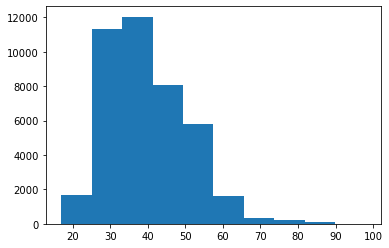

In [17]:
plt.hist(data['age']);

***The histogram for age variable is right-skewed(unimodal). Hence, we can state that the distribution of age is not symmetric.***

***For symmetric distribution the left side should be identical to the right side.***

In [18]:
np.median(data['age'])

38.0

In [19]:
mode = stats.mode(data['age'])
print(mode[0])

[31]


***The mean of the age variable is equal to 40.02406, the median is equal to 38.0 and the mode is equal to 31. As these 3 metrics are not equal, the distribution of age is not symmetric.***

**Point 2.**

In [20]:
num_housing = data[(data.housing == "yes")]

In [21]:
len(num_housing.index)

21576

**According to the code result, 21576 respondents have Housing loan.**

**Point 3.**

In [22]:
cross_tab = pd.crosstab(data.marital, data.job, margins=True, margins_name="Total",
            rownames = ['Marital status'], colnames = ['Job type'],
            normalize='index')

In [23]:
cross_tab

Job type,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Marital status,,,,,,,,,,,,
divorced,0.277537,0.157849,0.038812,0.034909,0.071769,0.075455,0.028838,0.115351,0.001951,0.167823,0.026886,0.002819
married,0.210727,0.268253,0.042964,0.031170,0.083801,0.051107,0.036264,0.092025,0.001645,0.147224,0.025433,0.009387
single,0.334976,0.157763,0.017548,0.010287,0.043309,0.008039,0.032763,0.098288,0.071231,0.197701,0.021698,0.006397
unknown,0.175000,0.175000,0.037500,0.037500,0.037500,0.062500,0.062500,0.075000,0.012500,0.150000,0.062500,0.112500
Total,0.253035,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,0.024619,0.008012


In [24]:
cross_tab.loc['married'].loc['services'] + cross_tab.loc['single'].loc['services']

0.19031341383516476

***The proportion of married and single respondents that work in service sector is equal to 0.19031341383516476.***

**Point 4.**

In [25]:
data_for_bar = data[(data.marital == 'married')]
data_for_bar

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [26]:
data_bar = pd.crosstab(data_for_bar.marital, data_for_bar.job)
data_bar

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
married,5253,6687,1071,777,2089,1274,904,2294,41,3670,634,234


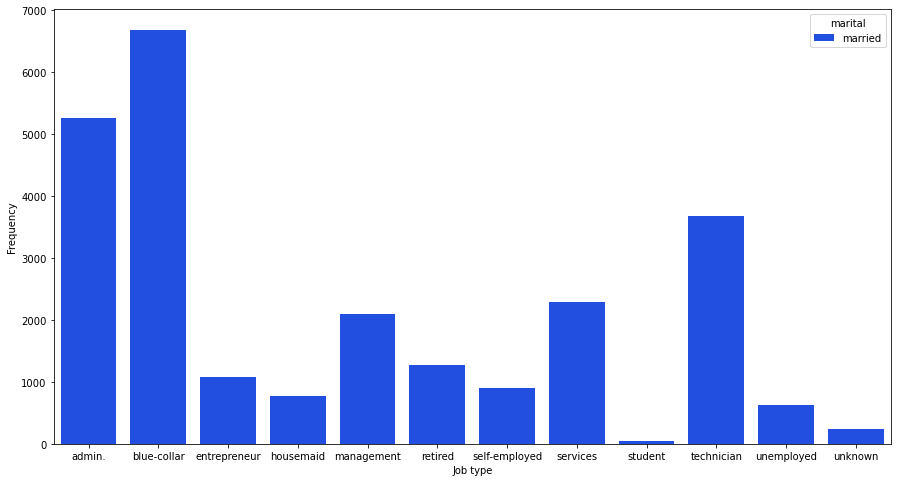

In [27]:
stacked = data_bar.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize =(15,8))
bar_plot = sns.barplot(x=stacked.job, y=stacked.value, hue=stacked.marital, palette= 'bright')
bar_plot.set(xlabel = "Job type", ylabel = "Frequency");

# **2nd version**

In [28]:
data_bar_second = pd.crosstab(data_for_bar.job, data_for_bar.marital)

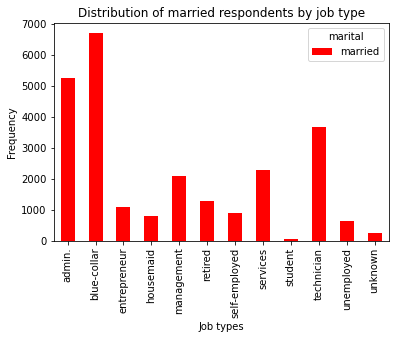

In [29]:
br = data_bar_second.plot(kind = 'bar', color = 'red')
plt.ylabel('Frequency')
plt.xlabel('Job types')
plt.title('Distribution of married respondents by job type')
plt.show();

**Point 5.**

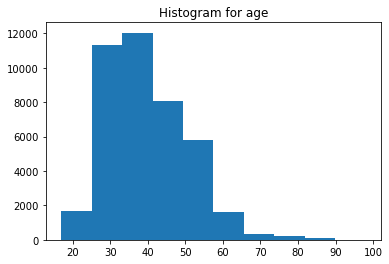

In [30]:
plt.title('Histogram for age')
plt.hist(data['age']);

***The histogram for age variable is right-skewed(unimodal) or positvely skewed. Therefore, the mean of the age is greater than the median. The median is greater than the mode of the age variable.***

**Point 6.**

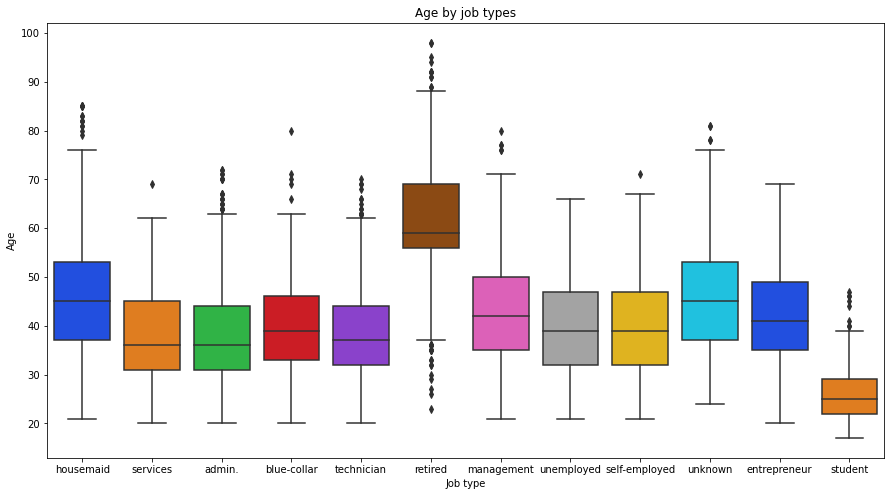

In [31]:
plt.figure(figsize=(15,8))
box_plot = sns.boxplot(x='job', y = 'age', data= data, palette= 'bright')
plt.title('Age by job types')
box_plot.set(xlabel = "Job type", ylabel = "Age");